1.Load and Inspect Dataset

In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\LAPTA\Big-Data-TP\TP3\pizza_sales.csv")
print(df.head())
print(df.shape)
print(df.dtypes)
print(df.info())


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0   1/1/2015   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0   1/1/2015   11:57:40   
2       3.0       2.0  five_cheese_l       1.0   1/1/2015   11:57:40   
3       4.0       2.0    ital_supr_l       1.0   1/1/2015   11:57:40   
4       5.0       2.0     mexicana_m       1.0   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

2.Convert Data Types (Dates and Numbers)

In [27]:
import pandas as pd


file_path = r"C:\Users\LAPTA\Big-Data-TP\TP3\pizza_sales.csv"


df = pd.read_csv(file_path)

numeric_cols = ["quantity", "unit_price", "total_price"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["order_time"] = pd.to_datetime(df["order_time"], format="%H:%M:%S", errors="coerce").dt.time

df["order_datetime"] = pd.to_datetime(df["order_date"].astype(str) + " " + df["order_time"].astype(str),
                                      errors="coerce")

print(df.head())
print(df.info())


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0 2015-01-01   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0 2015-01-01   11:57:40   
2       3.0       2.0  five_cheese_l       1.0 2015-01-01   11:57:40   
3       4.0       2.0    ital_supr_l       1.0 2015-01-01   11:57:40   
4       5.0       2.0     mexicana_m       1.0 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

3. Check Invalid Dates

In [29]:

mask_bad = df['order_date'].isna()
print("عدد القيم التي لم تتغير:", mask_bad.sum())

print("\nأمثلة من order_date قبل التحويل:")
print(df.loc[mask_bad, 'order_date'].head(20))


عدد القيم التي لم تتغير: 29033

أمثلة من order_date قبل التحويل:
1650   NaT
1651   NaT
1652   NaT
1653   NaT
1654   NaT
1655   NaT
1656   NaT
1657   NaT
1658   NaT
1659   NaT
1660   NaT
1661   NaT
1662   NaT
1663   NaT
1664   NaT
1665   NaT
1666   NaT
1667   NaT
1668   NaT
1669   NaT
Name: order_date, dtype: datetime64[ns]


4. Check Missing Dates but with Time

In [30]:

missing_date = df['order_date'].isna().sum()

missing_date_with_time = df[df['order_date'].isna() & df['order_time'].notna()].shape[0]

print("عدد السجلات بدون تاريخ:", missing_date)
print("عدد السجلات بدون تاريخ لكن عندهم وقت:", missing_date_with_time)


عدد السجلات بدون تاريخ: 29033
عدد السجلات بدون تاريخ لكن عندهم وقت: 29033


5. Remove Rows with Missing Dates

In [32]:
df = df.dropna(subset=['order_date'])
print("عدد السجلات بعد الحذف:", len(df))
print(df.head())


عدد السجلات بعد الحذف: 19587
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0 2015-01-01   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0 2015-01-01   11:57:40   
2       3.0       2.0  five_cheese_l       1.0 2015-01-01   11:57:40   
3       4.0       2.0    ital_supr_l       1.0 2015-01-01   11:57:40   
4       5.0       2.0     mexicana_m       1.0 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone C

6. Feature Engineering

In [ ]:
df['pizza_id'] = df['pizza_id'].astype(int)
df['order_id'] = df['order_id'].astype(int)
df['quantity'] = df['quantity'].astype(int)
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()
df['hour'] = df['order_datetime'].dt.hour
print(df.head())
print(df.dtypes)

   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

7. Detect Outliers

In [10]:
outliers = df[df["quantity"] > 10]
print("عدد السجلات الشاذة:", len(outliers))
outliers.head()


عدد السجلات الشاذة: 0


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_datetime,year,month,day,weekday,hour


8. Check Quantity Distribution

In [ ]:
df["quantity"].describe()

count    19587.000000
mean         1.019554
std          0.142104
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: quantity, dtype: float64

9. Check Duplicates

In [ ]:
df.duplicated().sum()
df[df.duplicated()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_datetime,year,month,day,weekday,hour


10. Check Null Values

In [ ]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
order_datetime       0
year                 0
month                0
day                  0
weekday              0
hour                 0
dtype: int64

11. Summary Statistics

In [15]:
print(df[['quantity', 'unit_price', 'total_price']].describe())

           quantity    unit_price   total_price
count  19587.000000  19587.000000  19587.000000
mean       1.019554     16.488278     16.813693
std        0.142104      3.594118      4.399458
min        1.000000      9.750000      9.750000
25%        1.000000     12.750000     12.750000
50%        1.000000     16.500000     16.500000
75%        1.000000     20.250000     20.500000
max        3.000000     35.950000     62.250000


12. Top 10 Pizzas Sold

pizza_name
The Hawaiian Pizza              999
The Pepperoni Pizza             985
The Barbecue Chicken Pizza      982
The California Chicken Pizza    957
The Classic Deluxe Pizza        951
The Thai Chicken Pizza          930
The Italian Supreme Pizza       806
The Southwest Chicken Pizza     788
The Spicy Italian Pizza         778
The Four Cheese Pizza           778
Name: quantity, dtype: int32


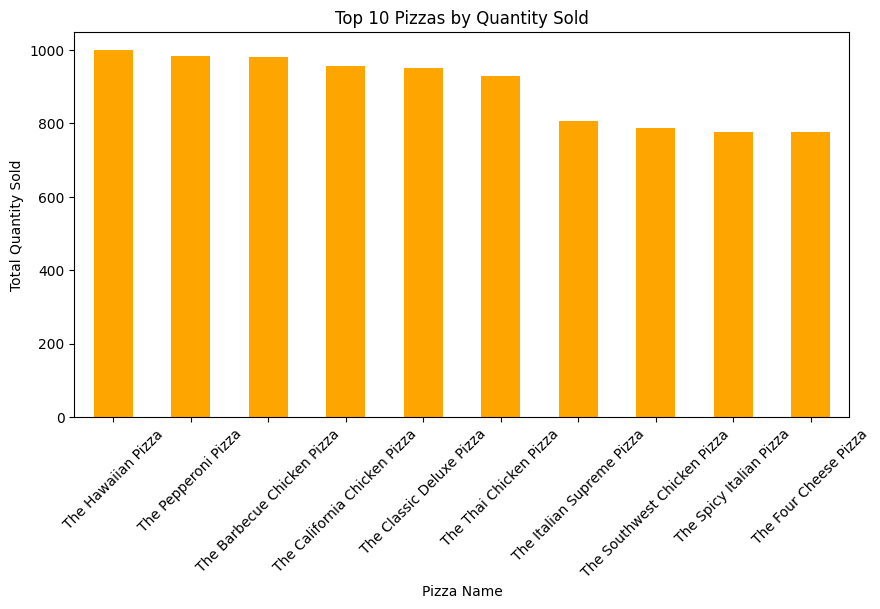

In [16]:
top_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_pizzas)

import matplotlib.pyplot as plt
top_pizzas.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Top 10 Pizzas by Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Pizza Name')
plt.xticks(rotation=45)
plt.show()


13. Sales by Category (Pie Chart)

pizza_category
Chicken    78822.5
Classic    86829.7
Supreme    84739.0
Veggie     78938.6
Name: total_price, dtype: float64


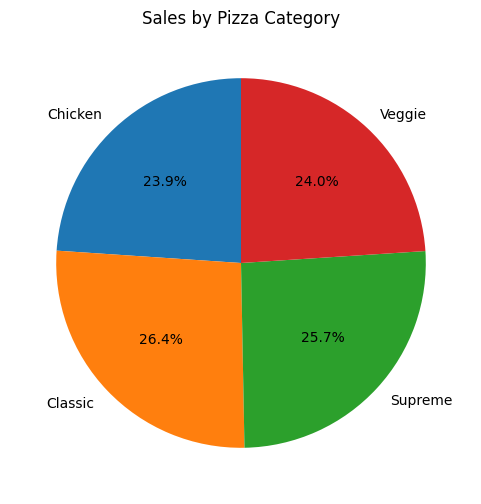

In [17]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
print(category_sales)

category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Sales by Pizza Category')
plt.ylabel('')
plt.show()


14. Sales by Pizza Size

pizza_size
L      152079.35
M      100460.75
S       71550.50
XL       5023.50
XXL       215.70
Name: total_price, dtype: float64


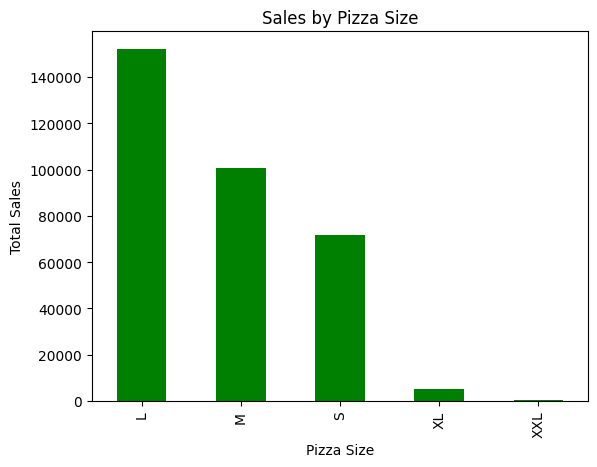

In [18]:
size_sales = df.groupby('pizza_size')['total_price'].sum()
print(size_sales)

size_sales.plot(kind='bar', color='green')
plt.title('Sales by Pizza Size')
plt.ylabel('Total Sales')
plt.xlabel('Pizza Size')
plt.show()


15. Daily Sales Trend

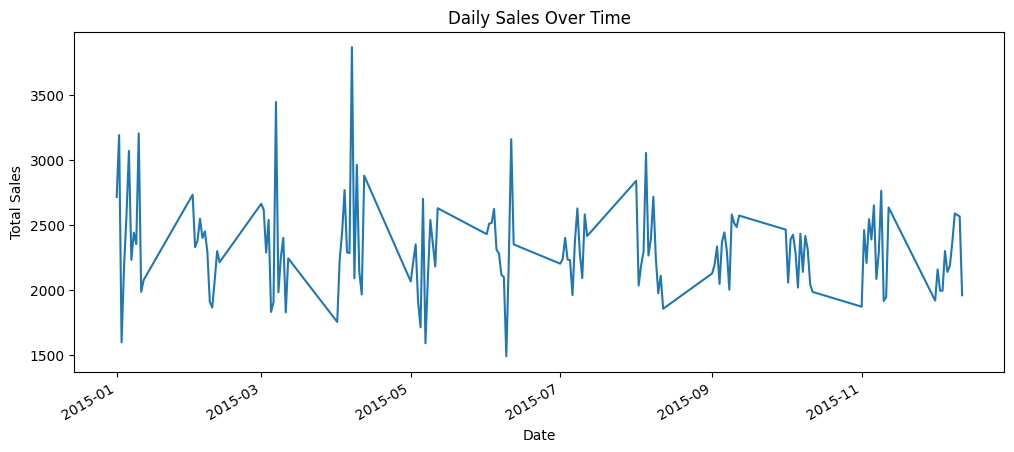

In [19]:
daily_sales = df.groupby('order_date')['total_price'].sum()
daily_sales.plot(kind='line', figsize=(12,5))
plt.title('Daily Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()


16. Hourly Sales

hour
10      176.75
11    16320.10
12    46764.80
13    41731.50
14    25609.45
15    22056.90
16    27409.00
17    35714.95
18    36180.50
19    27913.95
20    23293.35
21    16122.60
22     9638.25
23      397.70
Name: total_price, dtype: float64


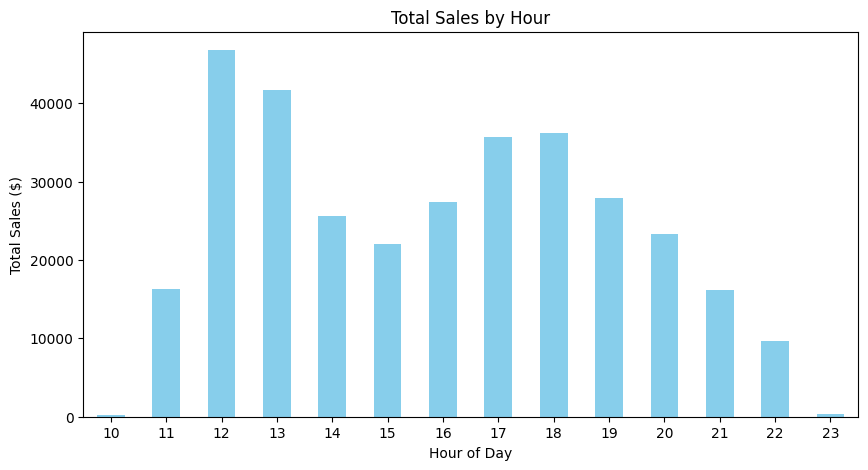

In [21]:
hourly_sales = df.groupby('hour')['total_price'].sum()
print(hourly_sales)

hourly_sales.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Total Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.show()


17. Sales by Weekday

weekday
Monday       44716.20
Tuesday      45754.50
Wednesday    48902.05
Thursday     49663.75
Friday       46408.25
Saturday     48660.90
Sunday       45224.15
Name: total_price, dtype: float64


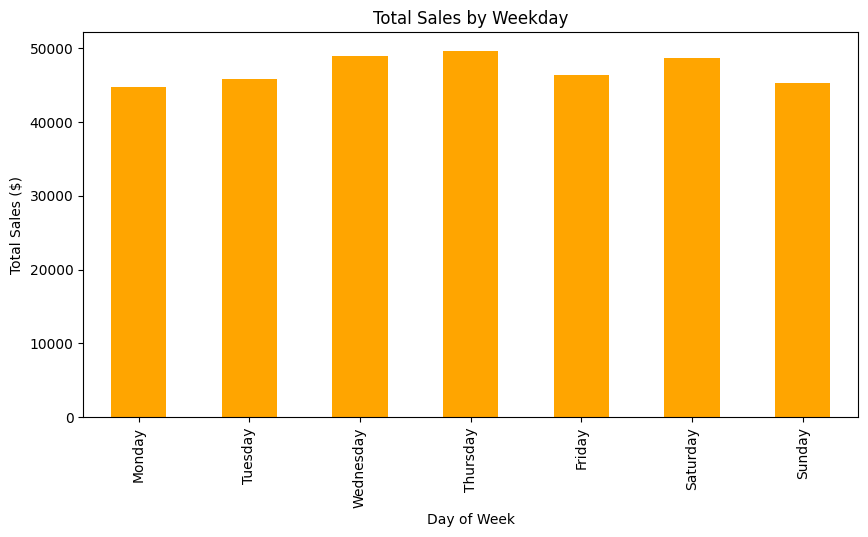

In [22]:
weekday_sales = df.groupby('weekday')['total_price'].sum()

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sales = weekday_sales.reindex(days_order)

print(weekday_sales)

weekday_sales.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Total Sales by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.show()


18. Heatmap of Category vs Size

pizza_size             L         M         S      XL    XXL
pizza_category                                             
Chicken         41188.75  26197.00  11436.75     0.0    0.0
Classic         29577.75  24374.25  27638.50  5023.5  215.7
Supreme         38708.50  27049.00  18981.50     0.0    0.0
Veggie          42604.35  22840.50  13493.75     0.0    0.0


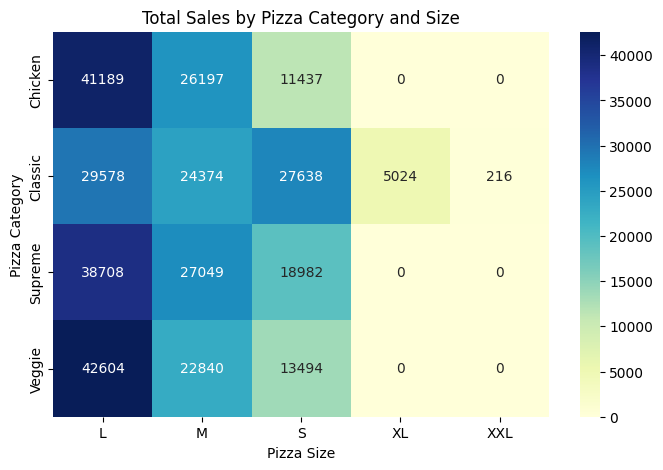

In [23]:
category_size_sales = df.pivot_table(values='total_price', 
                                     index='pizza_category', 
                                     columns='pizza_size', 
                                     aggfunc='sum', 
                                     fill_value=0)

print(category_size_sales)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(category_size_sales, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Total Sales by Pizza Category and Size')
plt.ylabel('Pizza Category')
plt.xlabel('Pizza Size')
plt.show()

19. Top Pizzas by Category

In [24]:
pizza_by_category = df.groupby(['pizza_category','pizza_name'])['quantity'].sum().sort_values(ascending=False)

print(pizza_by_category.head(10))

pizza_category  pizza_name                  
Classic         The Hawaiian Pizza              999
                The Pepperoni Pizza             985
Chicken         The Barbecue Chicken Pizza      982
                The California Chicken Pizza    957
Classic         The Classic Deluxe Pizza        951
Chicken         The Thai Chicken Pizza          930
Supreme         The Italian Supreme Pizza       806
Chicken         The Southwest Chicken Pizza     788
Supreme         The Spicy Italian Pizza         778
Veggie          The Four Cheese Pizza           778
Name: quantity, dtype: int32


20. Hourly Sales by Category (Stacked Bar)

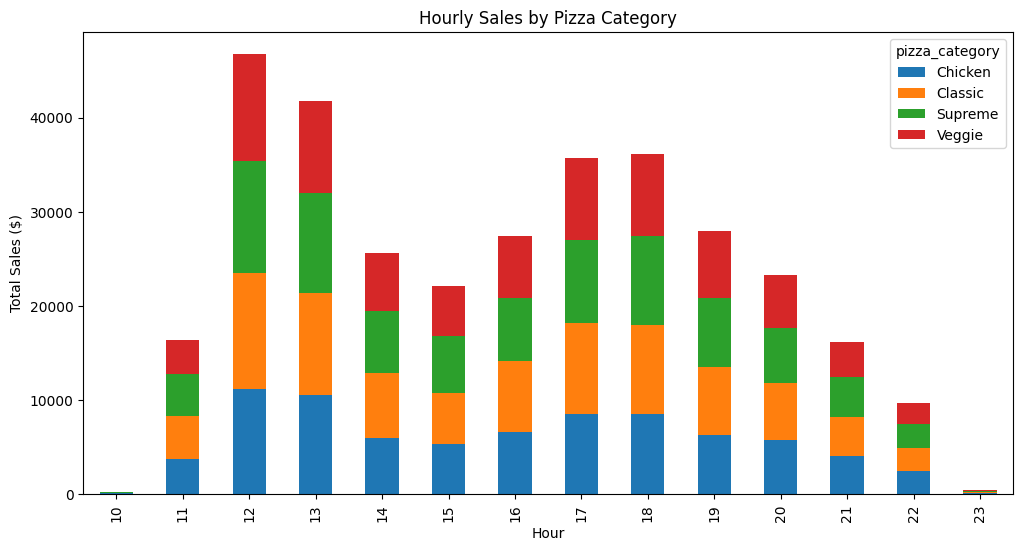

In [25]:
hourly_category_sales = df.pivot_table(values='total_price',
                                       index='hour',
                                       columns='pizza_category',
                                       aggfunc='sum',
                                       fill_value=0)

hourly_category_sales.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Hourly Sales by Pizza Category')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.show()

In [26]:
df.to_csv('cleaned_pizza_data.csv', index=False)